## <font color='darkred'>IA Aplicado a Finanças</font>

### <font color='darkgreen'> Otimização de Portfólio de Ativos Financeiros com IA </font>
  

Vamos desenvolver 3 estratégias de otimização:

- Estratégia 1 - Otimizando o Portfólio Com Base nos Valores Passados
- Estratégia 2 - Otimizando o Portfólio Com Base nos Valores Futuros Previstos Por IA
- Estratégia 3 - Otimizando o Portfólio Com Base nos Valores Futuros Previstos Por IA e Minimização do CVaR

A otimização de portfólio é um método matemático que é usado para selecionar a melhor alocação de ativos em um portfólio de investimentos. 

Seu objetivo é maximizar o retorno do portfólio para um determinado nível de risco, ou minimizar o risco para um determinado nível de retorno.

A otimização de portfólio é baseada na teoria moderna do portfólio de Harry Markowitz, que afirma que a diversificação pode ajudar os investidores a alcançar um portfólio eficiente, ou seja, um portfólio que oferece o maior retorno possível para um determinado nível de risco.

O processo de otimização de portfólio normalmente envolve as seguintes etapas:

- Definição dos ativos a serem considerados para inclusão no portfólio.
- Estimação do retorno esperado e risco (normalmente medido pelo desvio padrão dos retornos) para cada ativo.
- Estimação da correlação (ou covariância) entre os retornos de cada par de ativos.
- Seleção da combinação ótima de ativos usando um algoritmo de otimização, que pode ser baseado em programação linear, programação quadrática, ou outras técnicas.


A  Teoria  Moderna  do  Portfólio,  também  conhecida  como  Teoria  de Markowitz,  é  um modelo  teórico  sobre  como  os  investidores  racionais  usam  a  diversificação  para  otimizar  seus portfólios ou para obter o máximo retorno esperado com base em um determinado nível de risco de mercado. Essa teoria foi introduzida por Harry Markowitz em 1952 e rendeu a ele o Prêmio Nobel de Economia em 1990. 

Aqui estão os principais conceitos desta teoria:

- **Diversificação:**  Segundo  Markowitz,  os  investidores  podem  reduzir  o  risco  de  seus portfólios, diversificando-os, ou seja, incluindo uma variedade de ativos. Ao ter ativos que não estão  perfeitamente  correlacionados,  as  perdas  em  um  ativo  podem  ser  compensadas  por ganhos em outro.


- **Fronteira eficiente:** A teoria de Markowitz introduziu o conceito de "fronteira eficiente", que representa as combinações de ativos que oferecem o máximo retorno para um dado nível de  risco,  ou  o  menor  risco  para  um  dado  nível  de  retorno.  Portfólios  que  estão  na  fronteira eficiente são considerados ótimos.


- **Composição do portfólio:** A teoria também considera a correlação entre os ativos. Se os ativos se movem juntos (alta correlação), a diversificação pode não reduzir o risco tanto quanto se os ativos se movessem independentemente.


- **Risco e retorno:** A Teoria Moderna do Portfólio assume que os investidores são avessos ao  risco  e,  portanto,  se  dois  portfólios  oferecem  o  mesmo  retorno  esperado,  os  investidores escolherão o que tiver menor risco.

A Teoria Moderna do Portfólio foi um marco importante na economia e finanças e levou ao desenvolvimento de muitos outros modelos e teorias, incluindo o Modelo de Precificação de Ativos Financeiros (CAPM) e a teoria do mercado eficiente.




O **Índice de Sharpe** é uma métrica desenvolvida por William F. Sharpe que é usada para ajudar os investidores a entender o retorno de um investimento comparado ao seu risco. **O índice mede o desempenho ajustado ao risco de um investimento.** 

Para calcular o índice de Sharpe, você subtrai a taxa de retorno livre de risco de um investimento do retorno esperado de um portfólio e, em seguida, divide pelo desvio padrão dos retornos do portfólio. 

A taxa de retorno livre de risco é o que um investidor poderia esperar ganhar de um investimento absolutamente seguro, como um título do governo.

**Fórmula do Índice de Sharpe:**

> **Índice de Sharpe = (Retorno do portfólio -Taxa de retorno livre de risco) / Desvio padrão do portfólio** 

O resultado é um número que indica quanto retorno adicional um investidor pode esperar receber por assumir um risco adicional. Valores mais altos do índice de Sharpe indicam que o investimento tem um melhor retorno ajustado ao risco.

No entanto, é importante lembrar que como o índice de Sharpe usa o desvio padrão para medir o risco,  ele  assume  que  os  retornos  são  normalmente  distribuídos.  Ele  também  não diferencia o risco de queda (ou seja, o risco de perdas) do risco de alta (ou seja, a volatilidade dos retornos  positivos).  Portanto,  o  índice  de  Sharpe  pode  não  ser  adequado  para  avaliar investimentos que têm distribuições de retorno distorcidas ou assimétricas.

## <font color = darkred> Instalando e Carregando os Pacotes </font>

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [2]:
#!pip install -q yfinance

In [3]:
#!pip install -q PyPortfolioOpt

https://pyportfolioopt.readthedocs.io/en/latest/index.html

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Imports
import pandas as pd
import numpy as np
import yfinance as yf
import pypfopt
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [6]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Michelle Bouhid" --iversions

Author: Michelle Bouhid

pandas  : 1.5.3
platform: 1.0.8
yfinance: 0.2.44
pypfopt : 1.5.5
numpy   : 1.23.5



In [7]:
# Definimos as ações que farão parte do nosso portfólio
tickers = ["BTC-USD", "SPY", "GDX", "TLT", "BRK-A", "XLE"]

In [8]:
# Download dos precos de ações no período de 10 anos
precos = yf.download(tickers, start = "2015-01-01", end = "2024-07-01")

[*********************100%***********************]  6 of 6 completed


In [9]:
precos

Price                     Adj Close                                       \
Ticker                        BRK-A       BTC-USD        GDX         SPY   
Date                                                                       
2015-01-01 00:00:00+00:00       NaN    314.248993        NaN         NaN   
2015-01-02 00:00:00+00:00  223600.0    315.032013  17.354591  173.173767   
2015-01-03 00:00:00+00:00       NaN    281.082001        NaN         NaN   
2015-01-04 00:00:00+00:00       NaN    264.195007        NaN         NaN   
2015-01-05 00:00:00+00:00  220980.0    274.473999  17.812740  170.046341   
...                             ...           ...        ...         ...   
2024-06-26 00:00:00+00:00  617071.0  60811.277344  33.820000  543.841919   
2024-06-27 00:00:00+00:00  615000.0  61604.800781  34.230000  544.699280   
2024-06-28 00:00:00+00:00  612241.0  60320.136719  33.930000  542.555786   
2024-06-29 00:00:00+00:00       NaN  60887.378906        NaN         NaN   
2024-06-30 00:00:00+00:00       NaN  62678.292969        NaN         NaN   

Price                                                Close                \
Ticker                            TLT        XLE     BRK-A       BTC-USD   
Date                                                                       
2015-01-01 00:00:00+00:00         NaN        NaN       NaN    314.248993   
2015-01-02 00:00:00+00:00  100.043983  53.593723  223600.0    315.032013   
2015-01-03 00:00:00+00:00         NaN        NaN       NaN    281.082001   
2015-01-04 00:00:00+00:00         NaN        NaN       NaN    264.195007   
2015-01-05 00:00:00+00:00  101.615562  51.376640  220980.0    274.473999   
...                               ...        ...       ...           ...   
2024-06-26 00:00:00+00:00   91.948807  89.848007  617071.0  60811.277344   
2024-06-27 00:00:00+00:00   92.314026  90.056297  615000.0  61604.800781   
2024-06-28 00:00:00+00:00   90.596474  90.403427  612241.0  60320.136719   
2024-06-29 00:00:00+00:00         NaN        NaN       NaN  60887.378906   
2024-06-30 00:00:00+00:00         NaN        NaN       NaN  62678.292969   

Price                                             ...       Open              \
Ticker                           GDX         SPY  ...        GDX         SPY   
Date                                              ...                          
2015-01-01 00:00:00+00:00        NaN         NaN  ...        NaN         NaN   
2015-01-02 00:00:00+00:00  18.940001  205.429993  ...  18.070000  206.380005   
2015-01-03 00:00:00+00:00        NaN         NaN  ...        NaN         NaN   
2015-01-04 00:00:00+00:00        NaN         NaN  ...        NaN         NaN   
2015-01-05 00:00:00+00:00  19.440001  201.720001  ...  19.059999  204.169998   
...                              ...         ...  ...        ...         ...   
2024-06-26 00:00:00+00:00  33.820000  545.510010  ...  33.349998  543.690002   
2024-06-27 00:00:00+00:00  34.230000  546.369995  ...  34.200001  545.369995   
2024-06-28 00:00:00+00:00  33.930000  544.219971  ...  34.500000  547.159973   
2024-06-29 00:00:00+00:00        NaN         NaN  ...        NaN         NaN   
2024-06-30 00:00:00+00:00        NaN         NaN  ...        NaN         NaN   

Price                                             Volume               \
Ticker                            TLT        XLE   BRK-A      BTC-USD   
Date                                                                    
2015-01-01 00:00:00+00:00         NaN        NaN     NaN      8036550   
2015-01-02 00:00:00+00:00  126.290001  78.730003   300.0      7860650   
2015-01-03 00:00:00+00:00         NaN        NaN     NaN     33054400   
2015-01-04 00:00:00+00:00         NaN        NaN     NaN     55629100   
2015-01-05 00:00:00+00:00  128.009995  78.419998   500.0     43962800   
...                               ...        ...     ...          ...   
2024-06-26 00:00:00+00:00   93.279999  91.589996  1500.0  22506003064   
2024-06-27 00:00:00

Preço de Fechamento: Refere-se ao valor final de uma ação no final do pregão. É o último preço em que a ação foi negociada naquele dia.

Fechamento Ajustado: Considera o preço de fechamento, mas ajusta para eventos corporativos, como dividendos, desdobramentos (splits) ou agrupamentos (reverse splits). Ele reflete o valor ajustado para esses eventos, oferecendo uma visão mais precisa do retorno total da ação ao longo do tempo.

In [10]:
# Usaremos apenas os preços de fechamento ajustados
precos = precos["Adj Close"]

In [11]:
precos

Ticker,BRK-A,BTC-USD,GDX,SPY,TLT,XLE
Date,,,,,,
2015-01-01 00:00:00+00:00,NaN,314.248993,NaN,NaN,NaN,NaN
2015-01-02 00:00:00+00:00,223600.0,315.032013,17.354591,173.173767,100.043983,53.593723
2015-01-03 00:00:00+00:00,NaN,281.082001,NaN,NaN,NaN,NaN
2015-01-04 00:00:00+00:00,NaN,264.195007,NaN,NaN,NaN,NaN
2015-01-05 00:00:00+00:00,220980.0,274.473999,17.812740,170.046341,101.615562,51.376640
...,...,...,...,...,...,...
2024-06-26 00:00:00+00:00,617071.0,60811.277344,33.820000,543.841919,91.948807,89.848007
2024-06-27 00:00:00+00:00,615000.0,61604.800781,34.230000,544.699280,92.314026,90.056297
2024-06-28 00:00:00+00:00,612241.0,60320.136719,33.930000,542.555786,90.596474,90.403427


In [12]:
# Agrupa por ano usando o index diretamente e conta o número de NaN em cada coluna
nan_por_ano = precos.groupby(precos.index.year).apply(lambda x: x.isna().sum())

# Exibe o resultado
nan_por_ano

Ticker,BRK-A,BTC-USD,GDX,SPY,TLT,XLE
Date,,,,,,
2015,113,0,113,113,113,113
2016,114,0,114,114,114,114
2017,114,0,114,114,114,114
2018,114,0,114,114,114,114
2019,113,0,113,113,113,113
2020,113,0,113,113,113,113
2021,113,0,113,113,113,113
2022,114,0,114,114,114,114
2023,115,0,115,115,115,115


In [13]:
# Verificamos se há algum valor faltante e, se houver, preenchemos com o valor anterior (forward fill)
precos = precos.fillna(method = 'ffill')

In [14]:
precos.isna()

Ticker,BRK-A,BTC-USD,GDX,SPY,TLT,XLE
Date,,,,,,
2015-01-01 00:00:00+00:00,True,False,True,True,True,True
2015-01-02 00:00:00+00:00,False,False,False,False,False,False
2015-01-03 00:00:00+00:00,False,False,False,False,False,False
2015-01-04 00:00:00+00:00,False,False,False,False,False,False
2015-01-05 00:00:00+00:00,False,False,False,False,False,False
...,...,...,...,...,...,...
2024-06-26 00:00:00+00:00,False,False,False,False,False,False
2024-06-27 00:00:00+00:00,False,False,False,False,False,False
2024-06-28 00:00:00+00:00,False,False,False,False,False,False


In [15]:
precos.isna().sum()

Ticker
BRK-A      1
BTC-USD    0
GDX        1
SPY        1
TLT        1
XLE        1
dtype: int64

In [16]:
type(precos)

pandas.core.frame.DataFrame

In [17]:
precos.dtypes

Ticker
BRK-A      float64
BTC-USD    float64
GDX        float64
SPY        float64
TLT        float64
XLE        float64
dtype: object

In [18]:
# Ja está em index para configurar a serie temporal!
precos.index

DatetimeIndex(['2015-01-01 00:00:00+00:00', '2015-01-02 00:00:00+00:00',
               '2015-01-03 00:00:00+00:00', '2015-01-04 00:00:00+00:00',
               '2015-01-05 00:00:00+00:00', '2015-01-06 00:00:00+00:00',
               '2015-01-07 00:00:00+00:00', '2015-01-08 00:00:00+00:00',
               '2015-01-09 00:00:00+00:00', '2015-01-10 00:00:00+00:00',
               ...
               '2024-06-21 00:00:00+00:00', '2024-06-22 00:00:00+00:00',
               '2024-06-23 00:00:00+00:00', '2024-06-24 00:00:00+00:00',
               '2024-06-25 00:00:00+00:00', '2024-06-26 00:00:00+00:00',
               '2024-06-27 00:00:00+00:00', '2024-06-28 00:00:00+00:00',
               '2024-06-29 00:00:00+00:00', '2024-06-30 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=3469, freq='D')

### <font color = darkgreen> Calculando o Retorno Médio Histórico </font>

A função mean_historical_return() abaixo é da biblioteca PyPortfolioOpt e calcula o retorno médio histórico de cada ativo no DataFrame de preços de entrada.

O resultado dessa função, mu, é uma série Pandas onde o índice é o nome do ativo (neste caso, o símbolo da ação) e o valor é o retorno médio histórico anualizado para esse ativo.

A função mean_historical_return() calcula os retornos médios usando a **fórmula de retorno geométrico,** que é mais adequada para séries temporais financeiras do que a média aritmética, pois leva em consideração o efeito do reinvestimento de lucros.

O DataFrame de preços de entrada, **precos** neste caso, deve ser um DataFrame onde cada coluna é uma série de preços de um ativo e cada linha corresponde a uma data ou período de tempo.

Este valor calculado de mu é frequentemente usado como uma estimativa dos retornos futuros esperados ao otimizar um portfólio. No entanto, é importante lembrar que os retornos médios históricos não garantem retornos futuros.

In [19]:
# Calcula o retorno médio histórico
mu = expected_returns.mean_historical_return(precos)

In [20]:
mu

Ticker
BRK-A      0.075960
BTC-USD    0.469321
GDX        0.049938
SPY        0.086549
TLT       -0.007184
XLE        0.038735
dtype: float64

### <font color = darkgreen> Calculando a Matriz de Covariância Amostral dos Retornos dos Ativos</font>

A função sample_cov() abaixo é da biblioteca PyPortfolioOpt e calcula a matriz de covariância amostral dos retornos dos ativos no DataFrame de preços de entrada.

A matriz de covariância é uma medida que indica o grau em que dois ativos se movem em conjunto. Um valor de covariância positivo indica que os ativos tendem a se mover na mesma direção, enquanto um valor de covariância negativo indica que os ativos tendem a se mover em direções opostas.

No contexto da otimização de portfólio, a matriz de covariância é usada para modelar o risco do portfólio. Em particular, a variação (ou volatilidade) do portfólio é uma função da matriz de covariância dos retornos dos ativos no portfólio.

A função sample_cov() calcula a matriz de covariância amostral, que é uma **estimativa não tendenciosa da matriz de covariância** populacional. Esta é a matriz de covariância que seria obtida se tivéssemos acesso a todos os possíveis retornos dos ativos, em vez de apenas uma amostra de retornos.

In [21]:
# Calcula a matriz de covariância amostral dos retornos dos ativos
S = risk_models.sample_cov(precos)

In [22]:
S

Ticker,BRK-A,BTC-USD,GDX,SPY,TLT,XLE
Ticker,,,,,,
BRK-A,0.024528,0.011120,0.005010,0.017806,-0.004849,0.023921
BTC-USD,0.011120,0.339261,0.023486,0.016882,0.000125,0.016883
GDX,0.005010,0.023486,0.101949,0.008110,0.009605,0.016390
SPY,0.017806,0.016882,0.008110,0.021796,-0.004063,0.023455
TLT,-0.004849,0.000125,0.009605,-0.004063,0.016265,-0.008405
XLE,0.023921,0.016883,0.016390,0.023455,-0.008405,0.063092


### Explicação Detalhada da Matriz de Covariância

A matriz de covariância mostra como os retornos dos ativos variam juntos, sendo essencial para otimizar portfólios:

1. **Diagonal Principal**:
   - Valores como `0.339261` para `BTC-USD` são as **variâncias** dos ativos, indicando sua volatilidade. 
    - Variância: Mede a volatilidade (ou risco) de um ativo. Quanto maior, mais o retorno do ativo tende a variar em relação à sua média.

2. **Covariâncias (Fora da Diagonal)**:
   - Medem como os retornos de dois ativos se movem juntos. Exemplo: A covariância entre `BRK-A` e `BTC-USD` é `0.011120`.
   - **Positivo**: Ativos tendem a se mover na mesma direção.
   - **Negativo**: Movem-se em direções opostas.

3. **Diversificação**:
   - Ativos com covariâncias baixas ou negativas ajudam a reduzir o risco do portfólio, balanceando perdas e ganhos.


Uma variância mais alta indica que os retornos do ativo são mais voláteis, ou seja, os preços flutuam mais ao longo do tempo. Uma variância mais baixa indicaria retornos mais estáveis e, portanto, um ativo menos volátil.

Se o valor for positivo, como é o caso aqui, significa que, em geral, quando os retornos da Apple aumentam, os retornos da Amazon também tendem a aumentar, e vice-versa. Quanto maior o valor positivo, maior a correlação positiva entre os dois ativos. Esse valor é usado para entender como esses ativos se movem em relação um ao outro e ajuda na diversificação de portfólios.

### <font color = darkgreen> A Fronteira Eficiente </font>

É um conceito-chave na Teoria Moderna do Portfólio de Markowitz. Representa o conjunto de portfólios que, para um determinado nível de risco, oferece o maior retorno esperado, ou para um determinado retorno, apresenta o menor risco possível.

Em outras palavras, os portfólios que residem na fronteira eficiente são aqueles que têm a melhor relação possível de risco-retorno, de acordo com a medida de risco (geralmente o desvio padrão dos retornos) e o retorno esperado.

A fronteira eficiente é representada graficamente com o risco no eixo x e o retorno no eixo y. Cada ponto na linha representa um portfólio potencial de ativos. Portfólios abaixo da linha da fronteira eficiente são considerados ineficientes, pois para o mesmo nível derisco, há uma opção na fronteira que proporciona maior retorno. Da mesma forma, portfólios acima da linha também são ineficientes, pois para o mesmo nível de retorno, há uma opção na fronteira que apresenta menor risco.

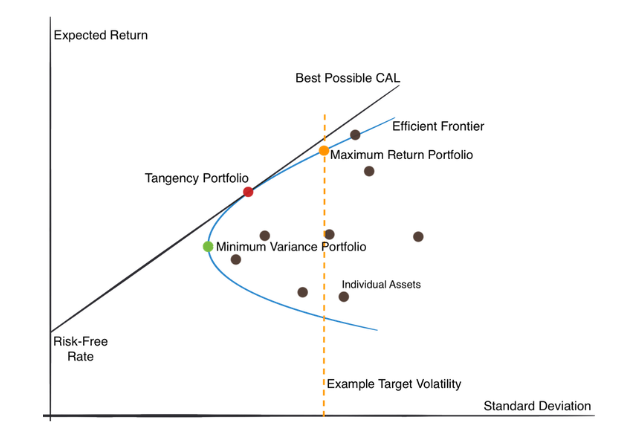


O objetivo da otimização do portfólio é encontrar o ponto na fronteira eficiente que corresponda ao nível de risco que o investidor está disposto a assumir. Isso varia de acordo com a aversão ao risco do investidor.

### <font color = darkgreen> Otimização de Portfólio Usando a Fronteira Eficiente de Markowitz</font>


A linha ef = EfficientFrontier(mu, S) abaixo está criando um objeto de otimização de portfólio usando a fronteira eficiente de Markowitz, que é um conceito fundamental na teoria moderna de portfólio.

Aqui está o que cada parte dessa linha faz:

EfficientFrontier: Este é um construtor de classe da biblioteca PyPortfolioOpt que cria um objeto que representa a fronteira eficiente de um portfólio. A fronteira eficiente é o conjunto de portfólios que tem o maior retorno esperado para um dado nível de risco, ou o menor risco para um dado nível de retorno esperado. Fazem simulação de cenarios buscando a Fronteira Eficiente.

mu: Esta é a série de retornos esperados para cada ativo, calculada pela função expected_returns.mean_historical_return(). Em outras palavras, mu representa o retorno esperado de cada ativo no portfólio.

S: Esta é a matriz de covariância dos ativos, calculada pela função risk_models.sample_cov(). Em outras palavras, S representa o risco (ou volatilidade) e a correlação de cada ativo no portfólio.

Ao criar um objeto EfficientFrontier com mu e S como argumentos, você está preparando os dados necessários para realizar a otimização de portfólio na fronteira eficiente. Uma vez que o objeto ef foi criado, você pode usar os vários métodos disponíveis para esse objeto para otimizar o portfólio, como max_sharpe(), min_volatility(), entre outros.

In [23]:
# Otimização de portfólio usando a fronteira eficiente de Markowitz
# ef é a instância da classe EfficientFrontier da biblioteca PyPortfolioOpt. Ao criar essa instância, você está inicializando 
# um objeto que contém todas as informações necessárias (retornos esperados e matriz de covariância) para otimizar um portfólio
# de acordo com a teoria da fronteira eficiente de Markowitz. Com essa instância, você pode aplicar métodos para 
# encontrar a melhor alocação de ativos, como maximizar o índice de Sharpe ou minimizar a volatilidade, entre outros.

# Passa como argumento a mtz de covariancia amostral dos retornos e o retorno historico medio.
ef = EfficientFrontier(mu, S) #instância da classe

In [24]:
#  o objeto (variável python) "ef" uma instância de uma classe que contém métodos e atributos específicos para otimização de portfólios. 
# Ele armazena dados internamente (como os retornos esperados e a matriz de covariância) e fornece métodos para manipular 
# esses dados e calcular resultados, como max_sharpe(), min_volatility(), entre outros.
type (ef)

pypfopt.efficient_frontier.efficient_frontier.EfficientFrontier

### <font color = darkgreen> Calculando os Pesos do Portfólio Que Maximizam o Índice de Sharpe</font>



O método max_sharpe() abaixo é do objeto EfficientFrontier e é usado para calcular os pesos do portfólio que maximizam o índice de Sharpe.

O Índice de Sharpe é uma métrica usada para entender o retorno ajustado ao risco de um investimento ou de um portfólio. Ele é calculado como a diferença entre o retorno do investimento e o retorno de um ativo livre de risco (como um Tesouro do governo), dividido pelo desvio padrão dos retornos do investimento. **Um índice de Sharpe maior indica que o retorno do investimento é mais alto em relação ao risco assumido**.

No contexto da otimização de portfólio, maximizar o índice de Sharpe é uma estratégia comum, pois tenta maximizar o retorno do portfólio para um determinado nível de risco.

A função ef.max_sharpe() faz isso resolvendo um problema de otimização onde o objetivo é encontrar os pesos que maximizam o índice de Sharpe. Esta função retorna os pesos brutos, que podem somar mais ou menos de 1 devido à precisão numérica.

No caso específico do método max_sharpe(), estamos maximizando o retorno ajustado ao risco, utilizando o índice de Sharpe como métrica. O índice de Sharpe é uma forma de avaliar o desempenho de um portfólio em relação ao risco assumido, e é calculado como o retorno esperado menos a taxa livre de risco dividido pelo desvio-padrão (ou volatilidade) dos retornos.

Portanto, ao usar max_sharpe(), o algoritmo tenta encontrar a alocação de ativos que maximize esse retorno ajustado ao risco. Isso se alinha mais com a ideia de maximizar o retorno dado um nível específico de risco.

A função usa como Default TLR 0,02, no Brasil devemos mudar pra SELIC

In [25]:
# Calcula os pesos do portfólio que maximizam o índice de Sharpe
# Usando o objeto ef, criado acima, chamamos o metodo max_sharp! Sensacional prog orientada a objetos! 
pesos_brutos = ef.max_sharpe()

In [26]:
pesos_brutos

OrderedDict([('BRK-A', 0.1424952200575492),
             ('BTC-USD', 0.3579227023914988),
             ('GDX', 0.0),
             ('SPY', 0.4995820775509521),
             ('TLT', 0.0),
             ('XLE', 0.0)])

Obs: O objeto retornado pelo método max_sharpe() é do tipo OrderedDict, conforme mostrado no seu código. Esse tipo de objeto é uma coleção ordenada de pares chave-valor, onde as chaves são os tickers dos ativos e os valores são os pesos atribuídos a cada ativo para maximizar o índice de Sharpe do portfólio.

Ele mantém a ordem de inserção e é similar a um dicionário Python, mas garante que a sequência dos elementos será mantida. Assim, você pode acessá-lo como um dicionário, iterar sobre ele ou convertê-lo para outros tipos, como DataFrame, se necessário.

### <font color = darkgreen> Normalizando os Pesos do Portfólio</font>

A função clean_weights() abaixo é da biblioteca PyPortfolioOpt e é usada para normalizar os pesos do portfólio para garantir que eles somem exatamente 1.

Na otimização de portfólio, os pesos representam a proporção do capital total investido em cada ativo. Por isso, a soma dos pesos deve ser igual a 1 (ou 100% se você preferir pensar em termos de porcentagens).

No entanto, devido à precisão numérica e a erros de arredondamento que podem ocorrer durante a otimização, a soma dos pesos brutos calculados pode ser ligeiramente diferente de 1. A função clean_weights() corrige isso ao normalizar os pesos de forma que a soma seja exatamente 1.

Além disso, clean_weights() também arredonda os pesos para uma precisão especificada (por padrão, 5 casas decimais) para facilitar a interpretação e a aplicação dos pesos.

In [27]:
# Normalizar os pesos do portfólio para garantir que eles somem exatamente 1
pesos_limpos = ef.clean_weights()

In [28]:
pesos_limpos

OrderedDict([('BRK-A', 0.1425),
             ('BTC-USD', 0.35792),
             ('GDX', 0.0),
             ('SPY', 0.49958),
             ('TLT', 0.0),
             ('XLE', 0.0)])

### <font color = darkgreen> Analisando a Performance Esperada Para o Portfólio</font>


A função portfolio_performance() abaixo é um método da classe EfficientFrontier da biblioteca PyPortfolioOpt que calcula várias métricas de desempenho para o portfólio otimizado.

Em particular, essa função calcula:

**Retorno esperado anual:** o retorno que se espera que o portfólio produza ao longo de um ano, com base nos pesos otimizados e nos retornos esperados dos ativos.

**Volatilidade anual:** a volatilidade (ou risco) do portfólio ao longo de um ano, com base nos pesos otimizados e na matriz de covariância dos retornos dos ativos.

**Índice de Sharpe:** uma medida de desempenho ajustada ao risco que é calculada como o retorno esperado em excesso (acima do retorno de um ativo livre de risco) dividido pela volatilidade. Um índice de Sharpe mais alto indica um desempenho melhor em termos de compensação risco-retorno.

O argumento verbose=True indica que a função deve imprimir os resultados. Se verbose=False, a função retornaria os resultados como uma tupla sem imprimi-los.

In [29]:
# Performance esperada para o portfólio
ef.portfolio_performance(verbose = True)

Expected annual return: 22.2%
Annual volatility: 24.3%
Sharpe Ratio: 0.83


(0.22204271522556254, 0.2431194483085922, 0.8310429981278551)

### Análise:


Performance Esperada do Portfólio:

Retorno Anual Esperado: 22.2%. Este é um retorno relativamente alto e indica que, com base na composição atual dos ativos, espera-se um retorno significativo ao longo de um ano.

Volatilidade Anual (Risco): 24.3%. A volatilidade também é alta, o que sugere que o portfólio possui um risco elevado, compatível com a expectativa de altos retornos.


Índice de Sharpe: 0.83. Este valor indica que, para cada unidade de risco assumido, o portfólio gera um retorno adicional. Embora positivo, é um valor que sugere um equilíbrio entre risco e retorno, mas não necessariamente o ideal para um perfil conservador.


Composição dos Pesos do Portfólio:


BRK-A: 14.25% do portfólio. Representa uma porção significativa, sugerindo confiança em ativos mais tradicionais.
BTC-USD: 35.79%. A exposição ao Bitcoin é alta, indicando uma escolha mais agressiva, aumentando potencialmente os retornos e a volatilidade.
SPY: 49.96%. Este ativo compõe quase metade do portfólio, o que reflete uma abordagem mais balanceada, já que o SPY representa o mercado americano como um todo.

Outros ativos, como GDX, TLT e XLE, não possuem peso, o que mostra que o modelo priorizou alocações mais concentradas em ativos específicos.

Análise Geral:
O portfólio demonstra um balanço entre ativos tradicionais e agressivos, refletindo um perfil de risco mais moderado a agressivo, focando em maximizar retornos mesmo assumindo volatilidade significativa. 

Para um perfil mais conservador, ajustes no modelo seriam necessários, especialmente para reduzir a exposição ao Bitcoin e equilibrar melhor os ativos menos voláteis.

### <font color = darkred> Estratégia 2 - Otimizando o Portfólio Com Base nos Valores Futuros Previstos Por IA </font>

No modelo passado usamos a média histórica dos retornos, agora vamos prever, através de IA os valores de Retorno, usando a relação matemática entre as variaveis, que serão aprendidas pelo modelo, nesse caso, usaremos Algoritmos Random Forrest.

## Random Forest

Random Forest é um algoritmo de aprendizado supervisionado usado para **classificação** e **regressão**, baseado em *ensemble learning*, que combina múltiplas árvores de decisão para melhorar a precisão.

### Como Funciona
1. **Criação de Árvores**: Gera múltiplas árvores usando subconjuntos aleatórios dos dados (*bootstrap*).
2. **Votação ou Média**:
   - Classificação: Cada árvore vota para determinar a classe final.
   - Regressão: A média das previsões das árvores é usada.
3. **Redução de Overfitting**: Trabalha com subconjuntos de dados/variáveis, evitando o overfitting comum em árvores individuais.

### Vantagens
- **Robustez**: Funciona bem com dados complexos e variáveis menos importantes.
- **Estabilidade**: Menos impacto de outliers e variações nos dados.
- **Facilidade de uso**: Parâmetros intuitivos, como o número de árvores (*n_estimators*).

### Desvantagens
- **Complexidade**: Treinamento demorado e modelo final difícil de interpretar.
- **Consome mais memória**: Armazena múltiplas árvores.

### Parâmetros Principais
- **n_estimators**: Quantidade de árvores.
- **max_features**: Número de características para dividir em cada nó.
- **max_depth**: Profundidade máxima da árvore.
- **min_samples_split**: Mínimo de amostras para dividir um nó.
- **min_samples_leaf**: Mínimo de amostras para ser uma folha.

### Exemplo de Uso com Scikit-Learn
```python
from sklearn.ensemble import RandomForestClassifier
# Criação do modelo
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Treinamento
rf.fit(X_train, y_train)

# Previsões
y_pred = rf.predict(X_test)


In [30]:
# Imports
import yfinance as yf
import numpy as np
import pandas as pd
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [31]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Michelle Bouhid" --iversions

Author: Michelle Bouhid

pandas  : 1.5.3
platform: 1.0.8
yfinance: 0.2.44
pypfopt : 1.5.5
numpy   : 1.23.5
sklearn : 1.3.0



In [32]:
# Dados históricos das ações
tickers = ["BTC-USD", "SPY", "GDX", "TLT", "BRK-A", "XLE"]
start_date = '2015-01-01'
end_date = '2024-07-01'

In [33]:
# Download e definição da coluna usada
dados = yf.download(tickers, start = start_date, end = end_date)['Adj Close']

[*********************100%***********************]  6 of 6 completed


**Calculando os Retornos Logarítmicos**

Os retornos logarítmicos (ou log retornos) são usados em finanças por várias razões. Aqui estão algumas:

Simplicidade na agregação de períodos de tempo: Com retornos logarítmicos, você pode simplesmente somar os retornos de períodos individuais para obter o retorno total de um período mais longo. Isso não é possível com retornos simples.

Aproximação contínua: Retornos logarítmicos são uma boa aproximação para retornos contínuos, que são frequentemente usados em matemática financeira e modelos de precificação de opções.

Normalidade dos retornos: Retornos logarítmicos têm propriedades estatísticas mais gerenciáveis, sendo geralmente mais próximos de uma distribuição normal do que retornos simples. Isso facilita a modelagem e a análise estatística.

Na linhha abaixo, estamos usando dados.pct_change() que está calculando os retornos simples, que são os retornos percentuais de um período para o outro. Em seguida, np.log(1 + dados.pct_change()) está convertendo esses retornos simples em retornos logarítmicos, adicionando 1 aos retornos simples antes de tomar o logaritmo, para garantir que os valores dentro do logaritmo sejam sempre positivos (uma vez que o logaritmo de zero ou qualquer número negativo é indefinido).

Os retornos logarítmicos calculados são usados em várias etapas subsequentes do script, como no cálculo da matriz de covariância dos retornos, que é usada na otimização do portfólio.

Trsnformando o dados sem perder a informação, deixando todos na mesma escala para netregar ao modelo de IA.

In [34]:
# Calculamos os retornos logarítmicos
log_returns = np.log(1 + dados.pct_change())

In [35]:
# Remover os valores NaN
log_returns = log_returns.dropna()

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [36]:
# Treinamos um modelo de regressão para cada ação no portfólio

# Dicionário vazio para os retornos futuros
retornos_futuros = {}

# Loop pelos dados das ações de cada empresa, pela lista de tickers
# previsão de retorno futuro para cada ticker
for ticker in tickers:
    
    # Listas auxiliares
    # x e y porque o Ramdon forrest é aprendizado supervisionado, entrada x e saida y
    X = []
    y = []
    
    # Loop pelos retornos com transformação logarítmica a partir dos dados históricos
    # Cria X e Y, sendo Y o valor atual e X os 5 valores anteriores
    # Algoritmo pega 5 valores anteriores e prevê o seguinte
    for i in range(5, len(log_returns)):
        X.append(log_returns[ticker].iloc[i-5:i].values)
        y.append(log_returns[ticker].iloc[i])
    
    # Divide os dados em treino e teste (20% teste e 80% treino)
    X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 42)

    # Cria o modelo
    modelo = RandomForestRegressor(random_state = 42) #pra produzir os mesmos dados q o prof
    
    # Treina o modelo
    modelo.fit(X_treino, y_treino)

    # Prevendo o próximo retorno
    # pega o dicionario retornos_futuros, criado acima, ticker é a chave e o valor (-1) é a previsão 
    # -1 é o ultimo registro e prevê o proximo
    retornos_futuros[ticker] = modelo.predict([X_teste[-1]])[0]
    
print("\nPrevisões do Modelo de IA Para o Retorno das Ações de Cada Empresa:\n")
print(retornos_futuros)


Previsões do Modelo de IA Para o Retorno das Ações de Cada Empresa:

{'BTC-USD': -0.0018493489071365636, 'SPY': 0.0016336184457448012, 'GDX': 0.0001874382879025696, 'TLT': 0.0005754934784942657, 'BRK-A': 0.006236404948893194, 'XLE': 0.0026780565422874296}


In [37]:
# Convertemos o dicionário de retornos futuros em um pandas Series
retornos_futuros = pd.Series(retornos_futuros)

In [38]:
# Calculamos a matriz de covariância
cov_matrix = risk_models.sample_cov(dados)

In [39]:
# Otimização do portfólio
ef = EfficientFrontier(retornos_futuros, cov_matrix)
pesos_brutos = ef.max_sharpe(risk_free_rate = 0.001)  
pesos_limpos = ef.clean_weights()

In [40]:
pesos_limpos

OrderedDict([('BTC-USD', 0.0),
             ('SPY', 0.0),
             ('GDX', 0.0),
             ('TLT', 0.0),
             ('BRK-A', 0.82851),
             ('XLE', 0.17149)])

In [41]:
# Desempenho do portfólio
ef.portfolio_performance(verbose = True)

Expected annual return: 0.6%
Annual volatility: 10.3%
Sharpe Ratio: 0.04


(0.005626178014767196, 0.10311015489518321, 0.044866366649045815)

### Análise:

Esses valores representam uma previsão do desempenho do portfólio no próximo ano. Aqui está uma interpretação de cada valor:

Retorno Anual Esperado: O Retorno Anual Esperado é a média ponderada do retorno esperado de cada ativo no portfólio, levando em conta a proporção (ou peso) de cada ativo no portfólio. Neste caso, espera-se que o retorno seja de 0,6% no próximo ano. Isso é bastante baixo, sugerindo que as expectativas de crescimento dos ativos no portfólio não são muito altas.

Volatilidade Anual: A Volatilidade Anual é uma medida do risco do portfólio. Ela é calculada como a raiz quadrada da variância do portfólio. A variância é a média ponderada da variância de cada ativo, levando em consideração os pesos de cada ativo e a correlação entre os ativos. Neste caso, a volatilidade é de 10,3%, o que sugere um nível relativamente alto de risco. Isso pode ser devido a uma grande variação nos retornos dos ativos no portfólio.

Índice de Sharpe: O Índice de Sharpe é uma medida do desempenho ajustado ao risco. Ele é calculado como o excesso de retorno (ou seja, retorno acima da taxa livre de risco) dividido pela volatilidade. Um índice de Sharpe mais alto é geralmente melhor, pois indica que você está obtendo mais retorno por unidade de risco. Neste caso, o Índice de Sharpe é de 0,04, o que é muito baixo. Isso sugere que o portfólio não está fornecendo muito retorno para o nível de risco assumido.

Em resumo, esses números sugerem um portfólio com expectativas de crescimento baixas, alto risco e baixo retorno ajustado ao risco. No entanto, lembre-se de que essas são apenas previsões e o desempenho real do portfólio pode variar.

### CVaR, ou Conditional Value at Risk (Valor em Risco Condicional), também conhecido como Expected Shortfall (Perda Esperada), 

É uma medida de risco que considera a severidade das perdas  que  podem  ocorrer  em  situações  de  extremo  risco.  Essencialmente,  o  CVaR é  uma extensão do Value at Risk (VaR), outra medida comumente usada no gerenciamento de risco financeiro.

Enquanto o VaR fornece um valor numérico que estima a perda máxima que pode ser sofrida com uma certa probabilidade (nível de confiança) em um determinado período de tempo, o CVaR leva em consideração a distribuição de perdas além do ponto VaR. Ou seja, o CVaR é a média condicional das perdas que excedem o VaR.

Por exemplo, se o VaR de um portfólio em um nível de confiança de 95% é de $100, isso significa  que  existe  uma  probabilidade  de  5%  de  o  portfólio  perder  mais  de  $100  em  um determinado  período  de  tempo.  

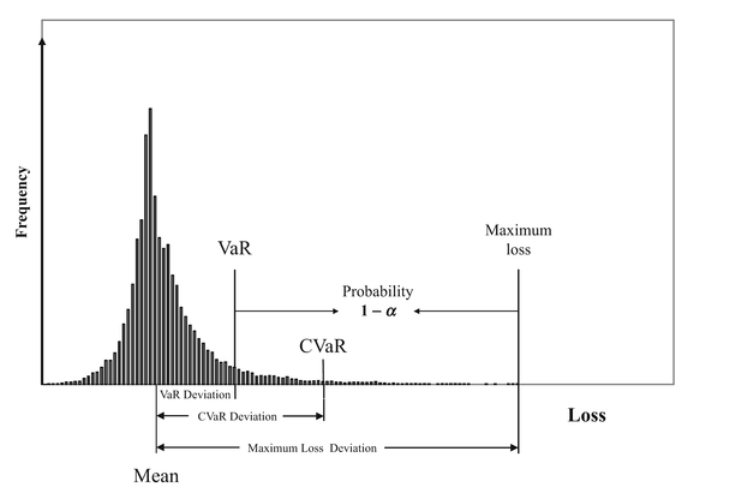

O  CVaR,  por  outro  lado,  seria  a  média  dessas  perdas  que excedem $100.O CVaR é considerado uma medida de risco mais robusta do que o VaR, porqueleva em consideração as perdas na cauda da distribuição de retornos (os "eventos de cauda"), que podem ser  extremamente  grandes. Esses  eventos  de  cauda  são  especialmente  importantes  para considerar em situações de crise financeira, onde grandes perdas podem ocorrer.



### <font color = darkred> Estratégia 3 - Otimizando o Portfólio Com Base nos Valores Futuros Previstos Por IA e Minimização do CVaR </font>

In [42]:
# Imports
import yfinance as yf
import numpy as np
import pandas as pd
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import EfficientCVaR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [43]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Michelle Bouhid" --iversions

Author: Michelle Bouhid

pandas  : 1.5.3
platform: 1.0.8
yfinance: 0.2.44
pypfopt : 1.5.5
numpy   : 1.23.5
sklearn : 1.3.0



In [44]:
# Dados históricos das ações
tickers = ["BTC-USD", "SPY", "GDX", "TLT", "BRK-A", "XLE"]
start_date = '2015-01-01'
end_date = '2024-07-01'

In [45]:
# Download
dados = yf.download(tickers, start = start_date, end = end_date)['Adj Close']

[*********************100%***********************]  6 of 6 completed


In [46]:
# Calcula os retornos logarítmicos
log_returns = np.log(1 + dados.pct_change())

In [47]:
# Remover os valores NaN
log_returns = log_returns.dropna()

In [48]:
# Treinamos um modelo de regressão para cada ação no portfólio

# Dicionário para os retornos futuros
retornos_futuros = {}

# Loop
for ticker in tickers:
    
    X = []
    y = []
    
    for i in range(5, len(log_returns)):
        X.append(log_returns[ticker].iloc[i-5:i].values)
        y.append(log_returns[ticker].iloc[i])
    
    X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 42)

    modelo = RandomForestRegressor(random_state = 42)
    
    modelo.fit(X_treino, y_treino)

    # Prever o próximo retorno
    retornos_futuros[ticker] = modelo.predict([X_teste[-1]])[0]
    
print("\nPrevisões do Modelo de IA Para o Retorno das Ações de Cada Empresa:\n")
print(retornos_futuros)


Previsões do Modelo de IA Para o Retorno das Ações de Cada Empresa:

{'BTC-USD': -0.0018493489071365636, 'SPY': 0.0016336184457448012, 'GDX': 0.0001874382879025696, 'TLT': 0.0005754934784942657, 'BRK-A': 0.006236404948893194, 'XLE': 0.0026780565422874296}


In [49]:
# Converte o dicionário de retornos futuros em um pandas Series
retornos_futuros = pd.Series(retornos_futuros)

In [50]:
# Calcula a matriz de covariância
cov_matrix = risk_models.sample_cov(dados)

In [51]:
# Otimiza o portfólio minimizando o CVaR
ef = EfficientCVaR(retornos_futuros, cov_matrix)
pesos_brutos = ef.min_cvar()
pesos_limpos = ef.clean_weights()

In [52]:
pesos_limpos

OrderedDict([('BTC-USD', 0.13527),
             ('SPY', 0.0),
             ('GDX', 0.86473),
             ('TLT', 0.0),
             ('BRK-A', 0.0),
             ('XLE', 0.0)])

In [53]:
# Desempenho do portfólio
ef.portfolio_performance(verbose = True)

Expected annual return: -0.0%
Conditional Value at Risk: -0.76%


(-8.80686350149238e-05, -0.0076498542996581665)

### Análise:

As métricas fornecidas representam uma previsão do desempenho do portfólio no próximo ano. Vamos interpretá-las:

Retorno Anual Esperado: O retorno anual esperado é a média ponderada dos retornos esperados de cada ativo no portfólio, levando em consideração a proporção (ou peso) de cada ativo no portfólio. Neste caso, o retorno esperado é de 0% no próximo ano. Isso significa que se espera que o portfólio perca valor no próximo ano, dadas as condições atuais do mercado e a composição do portfólio.

Valor em Risco Condicional (CVaR): O Valor em Risco Condicional (também conhecido como VaR Condicional ou Expected Shortfall) é uma medida de risco que leva em consideração os piores resultados possíveis. O CVaR de -0,76% indica que, no pior 5% dos cenários possíveis (supondo que estejamos usando um nível de confiança de 95%), a perda média do portfólio seria de 0,76% ao longo de um ano.

Os valores numéricos entre parênteses correspondem a essas duas métricas e são fornecidos para facilitar a referência ou para uso em cálculos posteriores.

Em resumo, a previsão para este portfólio não é muito positiva, já que se espera que ele tenha um retorno negativo e um risco potencialmente alto em cenários adversos. No entanto, essas são apenas previsões e o desempenho real do portfólio pode variar. Além disso, embora o retorno esperado seja negativo, a composição do portfólio pode ter sido escolhida para minimizar o CVaR, o que pode ser uma estratégia válida em certas circunstâncias (por exemplo, em um ambiente de mercado incerto ou volátil).

A análise desse portfólio, que minimiza o CVaR (Conditional Value at Risk), revela o seguinte:

Pesos Alocados:

BTC-USD: 13.57% do portfólio.
GDX: 86.43%.
Os outros ativos têm peso zero, indicando que a alocação se concentrou nesses dois.
Retorno e Risco:

Retorno Anual Esperado: -0.0%, indicando um portfólio muito conservador.
CVaR: -0.76%, que é o valor que o portfólio deve perder na média dos piores cenários.
Interpretação
O modelo otimizado minimiza perdas em situações extremas, mas não foca em maximizar retorno. O CVaR negativo indica um portfólio extremamente defensivo, sem foco em ganho, apenas em preservação. Isso pode ser uma estratégia conservadora e pouco adequada para agentes com perfil mais agressivo ou moderado.

Se o objetivo é aumentar o retorno com um certo nível de risco, outros métodos, como maximização do retorno com um CVaR-alvo ou uso da razão de Sharpe, poderiam ser mais apropriados.






